<a href="https://colab.research.google.com/github/Aashir-Aqeel/Ecommerce-Sales-Dashboard/blob/main/Ecommerce_Sales_Dashoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# File load
df = pd.read_csv('/content/ecommerce_sales_data.csv', parse_dates=["Order Date", "Ship Date"])



# Basic Data Cleaning & Preprocessing

In [27]:
# drop duplicate rows

df = df.drop_duplicates().copy()

# make sure numeric dtypes
for col in ["Sales", "Quantity", "Discount", "Profit"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# remove rows with missing numbers
df = df[(df["Sales"] >= 0) & (df["Quantity"] > 0)]

# conversion column
df["OrderMonth"] = df["Order Date"].dt.to_period("M").dt.to_timestamp()
df["ProfitMarginPct"] = np.where(df["Sales"] > 0, (df["Profit"] / df["Sales"]) * 100, np.nan)

# KPIs
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_orders = df["Order ID"].nunique()
avg_order_value = total_sales / total_orders if total_orders else 0
overall_margin = (total_profit / total_sales * 100) if total_sales else 0


print("=== KPIs ===")
print(f"Total Sales:        {total_sales:,.2f}")
print(f"Total Profit:       {total_profit:,.2f}")
print(f"Total Orders:       {total_orders:,}")
print(f"Avg Order Value:    {avg_order_value:,.2f}")
print(f"Overall Margin %:   {overall_margin:,.2f}%")

=== KPIs ===
Total Sales:        5,118,067.95
Total Profit:       777,841.95
Total Orders:       5,000
Avg Order Value:    1,023.61
Overall Margin %:   15.20%


# Line Chart

In [ ]:
# group by month
monthly_summary = df.groupby("OrderMonth").agg({
    "Sales": "sum",
    "Profit": "sum"
}).reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_summary["OrderMonth"], monthly_summary["Sales"], label="Sales", marker="o")
plt.plot(monthly_summary["OrderMonth"], monthly_summary["Profit"], label="Profit", marker="s")

plt.title("Monthly Sales & Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart

In [ ]:
# Highest Sales by Category

category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.bar(category_sales.index, category_sales.values, color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


In [ ]:
# Highest Sales by cities

top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_cities.index, top_cities.values, color="skyblue")
plt.title("Top 10 Cities by Sales")
plt.xlabel("Sales")
plt.ylabel("City")
plt.gca().invert_yaxis()  # so the highest is on top
plt.tight_layout()
plt.show()


# Histogram

In [ ]:
# profit margin distribution

plt.figure(figsize=(10,6))
plt.hist(df["ProfitMarginPct"].dropna(), bins=30, color="orange", edgecolor="black")
plt.title("Distribution of Profit Margin %")
plt.xlabel("Profit Margin %")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Scatter Plot

In [ ]:
# Sales vs Profit

plt.figure(figsize=(10,6))
plt.scatter(df["Sales"], df["Profit"], alpha=0.5, color="purple")
plt.title("Sales vs Profit Scatter Plot")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


# All In One

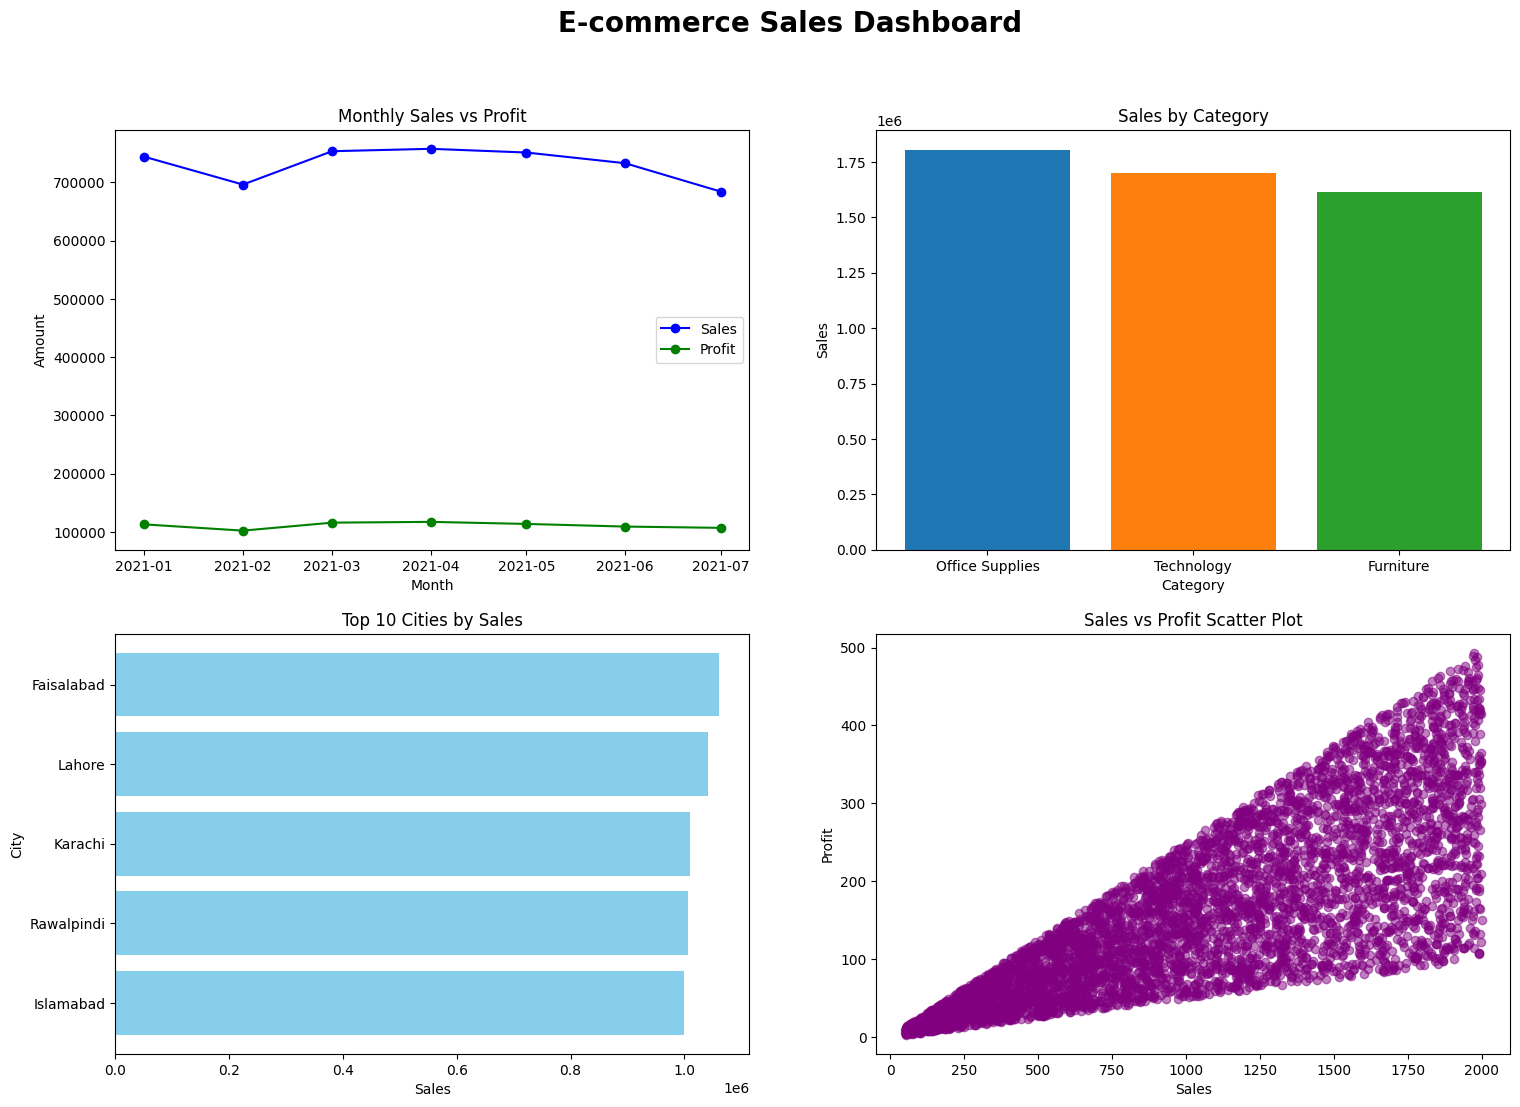

In [29]:
# create figure and axs grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Monthly Trend (Line chart)
monthly_trend = df.groupby("OrderMonth")[["Sales", "Profit"]].sum()

axes[0,0].plot(monthly_trend.index, monthly_trend["Sales"], label="Sales", color="blue", marker="o")
axes[0,0].plot(monthly_trend.index, monthly_trend["Profit"], label="Profit", color="green", marker="o")
axes[0,0].set_title("Monthly Sales vs Profit")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Amount")
axes[0,0].legend();

# Sales by Category (Bar chart)
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

axes[0,1].bar(category_sales.index, category_sales.values, color=["#1f77b4", "#ff7f0e", "#2ca02c"])
axes[0,1].set_title("Sales by Category")
axes[0,1].set_xlabel("Category")
axes[0,1].set_ylabel("Sales");

# Top 10 Cities (Horizontal Bar)
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

axes[1,0].barh(top_cities.index, top_cities.values, color="skyblue")
axes[1,0].invert_yaxis()
axes[1,0].set_title("Top 10 Cities by Sales")
axes[1,0].set_xlabel("Sales")
axes[1,0].set_ylabel("City");

# Sales vs Profit (Scatter Plot)
axes[1,1].scatter(df["Sales"], df["Profit"], alpha=0.5, color="purple")
axes[1,1].set_title("Sales vs Profit Scatter Plot")
axes[1,1].set_xlabel("Sales")
axes[1,1].set_ylabel("Profit");

# Layout Adjustments
plt.suptitle("E-commerce Sales Dashboard", fontsize=20, fontweight="bold")
# plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the main title
plt.show()
